# TCC PUC - Brazilian E-Commerce Public Dataset

## Módulo A - Discovery e Projeto da Solução

### Bibliotecas

In [1]:
# Importar Bibliotecas

import importlib

bibliotecas = ['zipfile', 'pandas', 'os', 'time', 'numpy', 'matplotlib', 'unidecode', 'mlxtend', 'sklearn']

for biblioteca in bibliotecas:
    try:
        importlib.import_module(biblioteca)
        print(f'{biblioteca} já está instalada.')
    except ImportError:
        print(f'{biblioteca} não está instalada.')
        %pip install {biblioteca}
        print(f'{biblioteca} foi instalada com sucesso!')

import zipfile
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import mlxtend
import sklearn

from unidecode import unidecode
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

zipfile já está instalada.
pandas já está instalada.
os já está instalada.
time já está instalada.
numpy já está instalada.
matplotlib já está instalada.
unidecode já está instalada.
mlxtend já está instalada.
sklearn já está instalada.


In [2]:
# Iniciar contagem do tempo de execução do processo
inicio = time.time()

### Download dataset

In [3]:
# Download dataset Kaggle
%pip install kaggle
!kaggle datasets download -d olistbr/brazilian-ecommerce


brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Caminho para captura do arquivo .zip
caminho_arquivo_zip = os.path.join(os.getcwd(),'brazilian-ecommerce.zip')

# Dicionário para armazenar os dataframes
dataframes = {}

with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    # Lista dos nomes dos arquivos CSV dentro do zip
    nomes_arquivos_csv = [nome for nome in zip_ref.namelist() if nome.endswith('.csv')]
    
    # Ler cada arquivo CSV em um dataframe separado
    for nome_arquivo in nomes_arquivos_csv:
        with zip_ref.open(nome_arquivo) as arquivo_csv:
            # Obter o nome do arquivo sem a extensão .csv
            nome_variavel = nome_arquivo[:-4]
            
            # Ler o arquivo CSV em um dataframe
            df = pd.read_csv(arquivo_csv)
            
            # Adicionar o dataframe ao dicionário usando o nome do arquivo como chave
            dataframes[nome_variavel] = df

### Análise geral

In [5]:
# Atribuir dataframes à variaveis
customers = dataframes['olist_customers_dataset']
geolocation = dataframes['olist_geolocation_dataset']
items = dataframes['olist_order_items_dataset']
payments = dataframes['olist_order_payments_dataset']
reviews = dataframes['olist_order_reviews_dataset']
orders = dataframes['olist_orders_dataset']
products = dataframes['olist_products_dataset']
sellers = dataframes['olist_sellers_dataset']
category = dataframes['product_category_name_translation']

In [6]:
# Visualizar as dimensões de cada df
for nome_variavel, df in dataframes.items():
    print(f"Nome do dataframe: {nome_variavel}")
    print(f"Dimensões: ", df.shape)
    display(df.head(3))

Nome do dataframe: olist_customers_dataset
Dimensões:  (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Nome do dataframe: olist_geolocation_dataset
Dimensões:  (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


Nome do dataframe: olist_order_items_dataset
Dimensões:  (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Nome do dataframe: olist_order_payments_dataset
Dimensões:  (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Nome do dataframe: olist_order_reviews_dataset
Dimensões:  (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Nome do dataframe: olist_orders_dataset
Dimensões:  (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Nome do dataframe: olist_products_dataset
Dimensões:  (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


Nome do dataframe: olist_sellers_dataset
Dimensões:  (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Nome do dataframe: product_category_name_translation
Dimensões:  (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


### Criando depara de Regiões

In [7]:
dados = [
    ('1', 'AC', 'Norte'),
    ('2', 'AL', 'Nordeste'),
    ('3', 'AP', 'Norte'),
    ('4', 'AM', 'Norte'),
    ('5', 'BA', 'Nordeste'),
    ('6', 'CE', 'Nordeste'),
    ('7', 'DF', 'Centro-Oeste'),
    ('8', 'ES', 'Sudeste'),
    ('9', 'GO', 'Centro-Oeste'),
    ('10', 'MA', 'Nordeste'),
    ('11', 'MT', 'Centro-Oeste'),
    ('12', 'MS', 'Centro-Oeste'),
    ('13', 'MG', 'Sudeste'),
    ('14', 'PA', 'Norte'),
    ('15', 'PB', 'Nordeste'),
    ('16', 'PR', 'Sul'),
    ('17', 'PE', 'Nordeste'),
    ('18', 'PI', 'Nordeste'),
    ('19', 'RJ', 'Sudeste'),
    ('20', 'RN', 'Nordeste'),
    ('21', 'RS', 'Sul'),
    ('22', 'RO', 'Norte'),
    ('23', 'RR', 'Norte'),
    ('24', 'SC', 'Sul'),
    ('25', 'SP', 'Sudeste'),
    ('26', 'SE', 'Nordeste'),
    ('27', 'TO', 'Norte')
]
depara = pd.DataFrame(dados, columns=['ID_UF', 'UF', 'region'])

### Transformações nos Dataframes

#### customers_dataset

In [8]:
# Dropar colunas
customers = customers.drop(['customer_unique_id'], axis=1)

# Join com depara de Regiões
customers = customers.merge(depara, left_on='customer_state', right_on='UF', how='left')
customers = customers.drop('UF', axis=1)

# Remover duplicatas
customers_trat = customers.drop_duplicates()

# Exibir df 
customers_trat.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,ID_UF,region
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,25,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,25,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,25,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,25,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,25,Sudeste


#### products_dataset

In [9]:
# Dropar colunas
products1 = products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)

# Filtrar valores que não são vazios
products_trat = products1.loc[~products1['product_category_name'].isnull()]

# Remover duplicatas
products_trat = products_trat.drop_duplicates()

# Exibir df
products_trat.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


#### items_dataset

In [10]:
# Dropar colunas
items_trat = items.drop(['order_item_id', 'shipping_limit_date', 'seller_id'], axis=1)

# Join com produtos
items_trat = items_trat.merge(products_trat, left_on='product_id', right_on='product_id', how='left')

# Remover duplicatas
items_trat = items_trat.drop_duplicates()

# Exibir df
items_trat.head(10)

,order_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0
5,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,utilidades_domesticas,450.0,24.0,8.0,15.0
6,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,telefonia,200.0,27.0,5.0,20.0
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75,ferramentas_jardim,13805.0,35.0,75.0,45.0
8,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,beleza_saude,2000.0,30.0,12.0,16.0
9,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,53.99,11.40,livros_tecnicos,850.0,29.0,3.0,21.0


#### reviews_dataset

In [11]:
# Corrigir valores nulos
reviews['review_comment_title'] = reviews['review_comment_title'].fillna('-')
reviews['review_comment_message'] = reviews['review_comment_message'].fillna('-')
reviews['review_score'] = reviews['review_score'].fillna('-')
reviews1 = reviews

# Alterar o tipo do dado
reviews1['review_creation_date'] = pd.to_datetime(reviews1['review_creation_date'], format='mixed', dayfirst=True)
reviews1['review_answer_timestamp'] = pd.to_datetime(reviews1['review_answer_timestamp'], format='mixed', dayfirst=True)

# Inserir nova coluna calculada
reviews1['average_response_time'] = (reviews1['review_answer_timestamp'] - reviews1['review_creation_date']).dt.days.astype(int)

# Remover valores duplicados
reviews_trat = reviews.drop_duplicates()

# Exibir df
reviews_trat.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,average_response_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,-,-,2018-01-18,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,-,-,2018-03-10,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,-,-,2018-02-17,2018-02-18 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,-,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,-,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1


#### payments_dataset

In [12]:
# Dropar colunas
payments_trat = payments.drop(['payment_sequential', 'payment_installments'], axis=1)

# Agrupar os valores por "order_id" e somar os valores de pagamento
grouped_payments = payments_trat.groupby('order_id')['payment_value'].sum().reset_index()

# Encontrar o "payment_type" de maior valor para cada "order_id"
max_payment_type = payments_trat.groupby('order_id')['payment_value'].idxmax()

# Filtrar o dataframe original com base no índice do "payment_type" de maior valor
final_payments = payments_trat.loc[max_payment_type]

# Juntar os valores de pagamento somados com os "payment_type" de maior valor
payments_trat = final_payments.merge(grouped_payments, on='order_id')

# Dropar colunas
payments_trat = payments_trat.drop(['payment_value_x'], axis=1)

# Renomear colunas
payments_trat = payments_trat.rename(columns={'payment_value_y' : 'payment_value'})

#Exibir df
payments_trat.head()

,order_id,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04


#### orders_dataset

In [13]:
# Alterar tipo dos dados
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

# Incluir coluna calculada
orders['average_delivery_time'] = np.where(orders['order_status'] == 'delivered',
                                         (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.days,
                                         0)

# Join com payments
orders_trat = orders.merge(payments_trat, left_on='order_id', right_on='order_id', how='left')

# Remover valores duplicados
orders_trat = orders_trat.drop_duplicates()

# Exibir df
orders_trat.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,average_delivery_time,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,voucher,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,boleto,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,credit_card,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,credit_card,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,credit_card,28.62


### Exportar arquivos para ingestão no PowerBI

In [14]:
# Criar uma pasta para salvar os arquivos CSV
pasta_destino = 'datasets_inputs'
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# Exportar dataframes
customers_trat.to_csv(os.path.join(pasta_destino, 'customers.csv'), index=False)
items_trat.to_csv(os.path.join(pasta_destino, 'items.csv'), index=False)
reviews_trat.to_csv(os.path.join(pasta_destino, 'reviews.csv'), index=False)
orders_trat.to_csv(os.path.join(pasta_destino, 'orders.csv'), index=False)

print("Arquivos CSV salvos na pasta:", pasta_destino)

Arquivos CSV salvos na pasta: datasets_inputs


## Módulo C - Análises Avançadas e Proposta de Intervenção

### Clusterização - Perfil de Clientes

c:\Users\Felipe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


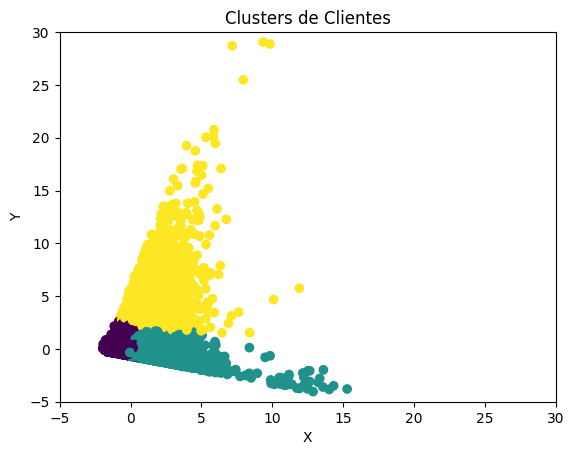

In [15]:
# Fundir os dataframes usando a coluna "customer_id" como chave
df_merged = pd.merge(orders_trat, customers_trat, on='customer_id', how='left')

# Selecionar as colunas relevantes para a clusterização
features = ['average_delivery_time', 'payment_value', 'ID_UF']

# Preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean')
df_merged[features] = imputer.fit_transform(df_merged[features])

# Pré-processamento dos dados
scaler = StandardScaler()
X = scaler.fit_transform(df_merged[features])

# Executar o algoritmo de clusterização
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X)

# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Adicionar os rótulos das clusters ao dataframe
df_merged['cluster_label'] = kmeans.labels_

# Plotar os clusters
plt.xlim(-5, 30)  # Intervalo personalizado para o eixo X
plt.ylim(-5, 30)  # Intervalo personalizado para o eixo Y
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_merged['cluster_label'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters de Clientes')
plt.show()

### Regressão Linear - Previsão de Vendas

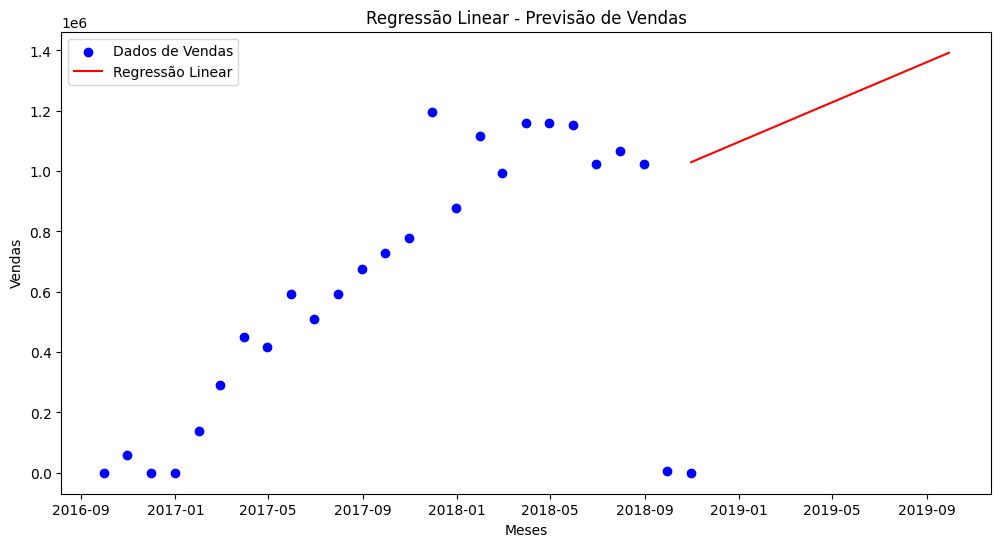

In [16]:
# Carregar os dataframes
ordens = orders_trat

# Converter a coluna 'order_purchase_timestamp' para o formato de data
ordens['order_purchase_timestamp'] = pd.to_datetime(ordens['order_purchase_timestamp'])

# Agrupar as vendas por mês e calcular a soma das vendas
vendas_por_mes = ordens.resample('M', on='order_purchase_timestamp')['payment_value'].sum()

# Criar um dataframe com o índice sendo os meses e a coluna sendo as vendas
df = pd.DataFrame({'Meses': vendas_por_mes.index, 'Vendas': vendas_por_mes.values})

# Criar as variáveis de entrada X (meses) e de saída y (vendas)
X = pd.to_numeric(df['Meses']).values.reshape(-1, 1)
y = df['Vendas'].values

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, y)

# Fazer a previsão de vendas para os próximos 6 meses
meses_futuros = pd.date_range(start=df['Meses'].max(), periods=12, freq='M')
X_pred = pd.to_numeric(meses_futuros).values.reshape(-1, 1)
y_pred = model.predict(X_pred)

# Plotar os dados de vendas e a regressão
plt.figure(figsize=(12, 6))
plt.scatter(df['Meses'], df['Vendas'], color='b', label='Dados de Vendas')
plt.plot(meses_futuros, y_pred, color='r', label='Regressão Linear')
plt.xlabel('Meses')
plt.ylabel('Vendas')
plt.title('Regressão Linear - Previsão de Vendas')
plt.legend()
plt.show()


### Regras de Associação - Items comprados com frequencia

In [17]:
# Preencher valores ausentes na coluna 'product_category_name' com uma string vazia
items_trat['product_category_name'] = items_trat['product_category_name'].fillna('')

# Criar a lista pivô
df_pivot = items_trat.groupby('order_id')['product_category_name'].apply(list).reset_index()

# Converter o DataFrame em uma lista de listas
transactions = df_pivot['product_category_name'].tolist()

# Instanciar o TransactionEncoder
te = TransactionEncoder()

# Ajustar e transformar os dados
te_ary = te.fit_transform(transactions)

# Converter de volta para DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar o algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Exibir os itens frequentes
print(frequent_itemsets)

    support                  itemsets
0  0.089555            (beleza_saude)
1  0.095443         (cama_mesa_banho)
2  0.078244           (esporte_lazer)
3  0.067794  (informatica_acessorios)
4  0.065362        (moveis_decoracao)
5  0.057000      (relogios_presentes)
6  0.059636   (utilidades_domesticas)


In [18]:
# Fim da contagem do tempo de execução
fim = time.time()

# Cálculo do tempo decorrido
tempo_decorrido = fim - inicio

# Conversão do tempo decorrido para estrutura de tempo
tempo_struct = time.gmtime(tempo_decorrido)

# Formatação do tempo para exibição
tempo_formatado = time.strftime("%H:%M:%S", tempo_struct)

# Exibindo o tempo decorrido
print("Tempo de execução:", tempo_formatado, "(HH:MM:SS)")

Tempo de execução: 00:00:50 (HH:MM:SS)
